In [22]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#import modeling libraries
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf


In [24]:
# Print tensorflow version
print(tf.__version__)

2.12.0


In [25]:
# define data path

data_dir = "/home/user/Desktop/4th Year Project/waru bora/ML/data"

data_dir

'/home/user/Desktop/4th Year Project/waru bora/ML/data'

In [26]:
batch_size = 32
img_height = 128
img_width = 128

In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.


## EDA

### Training images

2023-03-26 10:40:09.859880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1722]
	 [[{{node Placeholder/_0}}]]
2023-03-26 10:40:09.860807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1722]
	 [[{{node Placeholder/_0}}]]
2023-03-26 10:40:11.075885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [430]


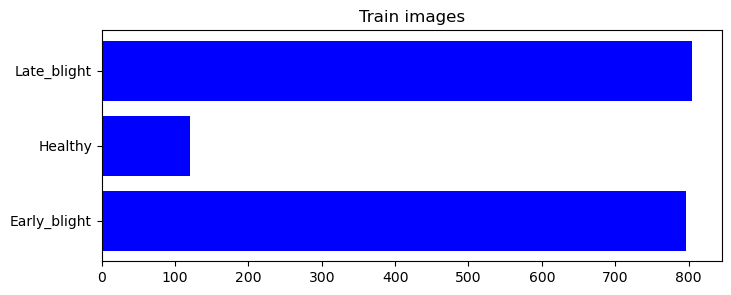

In [28]:
def plot_distribution(y, title):
    a = Counter(y)
    y = ['Early_blight', 'Healthy', 'Late_blight']
    
    x = [a[i] for i in range(3)]
    plt.figure(figsize=(8, 3))
    plt.barh(y, x, color='blue')
    plt.title(title)
    return plt.show()

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")


### Validation images

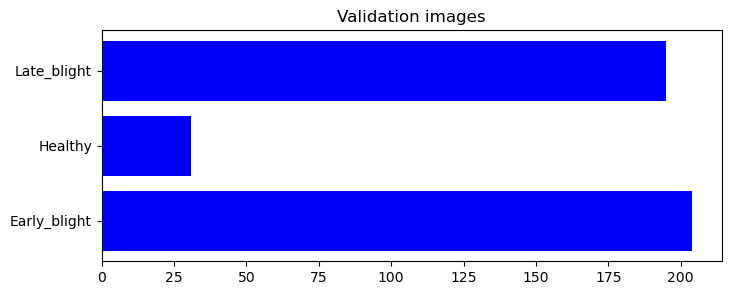

In [29]:
plot_distribution(y_val, title = "Validation images")

### Sample Images

In [30]:

import os

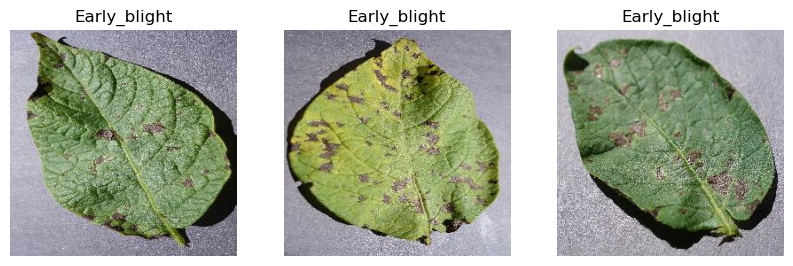

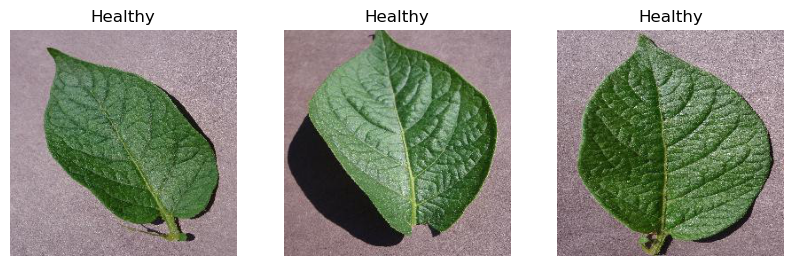

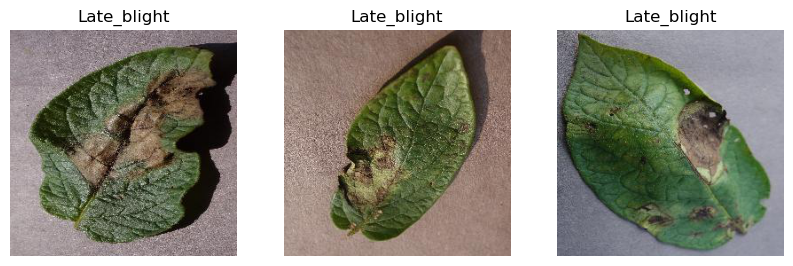

In [31]:
## Sample images
class_names = train_ds.class_names

for class_name in class_names:
    imgs = os.listdir(os.path.join(data_dir, class_name))[:3]
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(imgs):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(plt.imread(os.path.join(data_dir, class_name, img)))
        plt.title(class_name)
        plt.axis('off')

## Modeling

In [32]:
# Configure the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Defining TF model architecture

In [33]:

#Model Architecture - preparing our model

num_classes = 3

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    # Rescaling will be helpful in deployment, as raw images will be rescaled within the model
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax')

])

### Training the model

In [34]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                      min_delta=0.0001,
                                                      patience=5)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[earlystop_callback])

Epoch 1/20


2023-03-26 10:40:14.461011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1722]
	 [[{{node Placeholder/_0}}]]
2023-03-26 10:40:14.462498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1722]
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.6963

2023-03-26 10:40:39.273705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [430]
	 [[{{node Placeholder/_4}}]]
2023-03-26 10:40:39.274226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [430]
	 [[{{node Placeholder/_4}}]]


54/54 [==============================] - 26s 456ms/step - loss: 0.6918 - accuracy: 0.6963 - val_loss: 0.5479 - val_accuracy: 0.7721
Epoch 2/20
54/54 [==============================] - 23s 426ms/step - loss: 0.3466 - accuracy: 0.8682 - val_loss: 0.2060 - val_accuracy: 0.9512
Epoch 3/20
54/54 [==============================] - 23s 432ms/step - loss: 0.1934 - accuracy: 0.9303 - val_loss: 0.1607 - val_accuracy: 0.9395
Epoch 4/20
54/54 [==============================] - 25s 456ms/step - loss: 0.1374 - accuracy: 0.9489 - val_loss: 0.3358 - val_accuracy: 0.8977
Epoch 5/20
54/54 [==============================] - 20s 368ms/step - loss: 0.1295 - accuracy: 0.9512 - val_loss: 0.1158 - val_accuracy: 0.9651
Epoch 6/20
54/54 [==============================] - 16s 287ms/step - loss: 0.1106 - accuracy: 0.9524 - val_loss: 0.2160 - val_accuracy: 0.9000
Epoch 7/20
54/54 [==============================] - 16s 293ms/step - loss: 0.0838 - accuracy: 0.9675 - val_loss: 0.2210 - val_accuracy: 0.9093
Epoch 8/20

the model has a 99% training accuracy with a 93% validation accuracy.

### Saving the model

In [36]:
model.save('model_v1.h5')

## Evaluation

### Accuracy plots

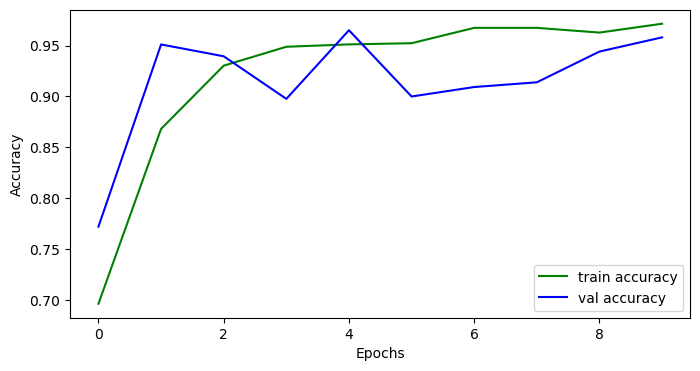

In [38]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

# Accuracy plots
plt.figure(figsize=(8, 4))
plt.plot(train_acc, color='green', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color='blue', linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Loss plots

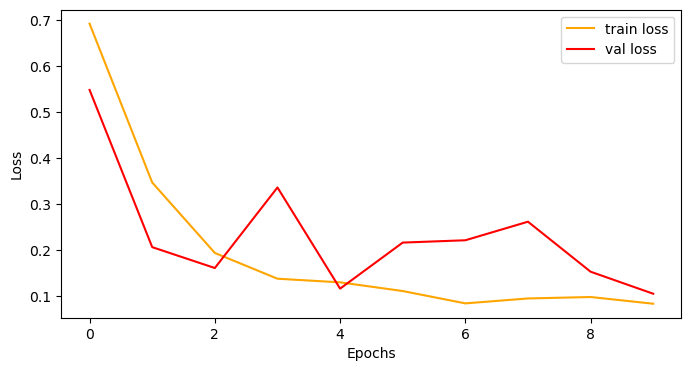

In [39]:
# loss plots
plt.figure(figsize=(8, 4))
plt.plot(train_loss, color='orange', linestyle='-', label='train loss')
plt.plot(valid_loss, color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Confusion Matrix

1/1 [==============================] - 0s 274ms/step


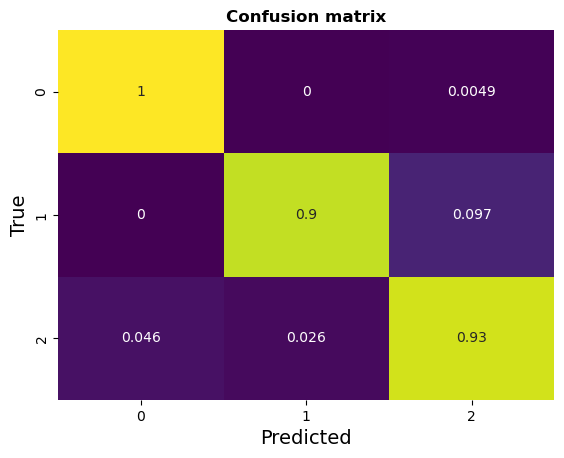

In [40]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:  
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

# Confusion matrix
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')

sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)

plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)

plt.show()

### Classification Report

In [41]:
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       204
           1       0.85      0.90      0.88        31
           2       0.98      0.93      0.95       195

    accuracy                           0.96       430
   macro avg       0.93      0.94      0.93       430
weighted avg       0.96      0.96      0.96       430

